## T2I metrics

In [1]:
# !git clone https://github.com/linzhiqiu/t2v_metrics

In [2]:
# !git clone https://github.com/Yushi-Hu/tifa.git

In [ ]:
import sys
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from src.evaluator import EnhancedEvaluator
import json

In [2]:
sys.path.append('./t2v_metrics')
sys.path.append('./tifa')
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [5]:
evaluator = EnhancedEvaluator()

INFO:root:Loaded ViT-L-14-336 model config.
INFO:root:Loading pretrained ViT-L-14-336 weights (openai).


Loading mplug-large...


2025-06-17 12:35:20,652 - modelscope - WARNING - Model revision not specified, use revision: v1.0.0


2025-06-17 12:35:24,974 - modelscope - WARNING - Model revision not specified, use revision: v1.0.0
2025-06-17 12:35:25,602 - modelscope - INFO - initiate model from /Users/evgeniasivets/.cache/modelscope/hub/models/damo/mplug_visual-question-answering_coco_large_en
2025-06-17 12:35:25,603 - modelscope - INFO - initiate model from location /Users/evgeniasivets/.cache/modelscope/hub/models/damo/mplug_visual-question-answering_coco_large_en.
2025-06-17 12:35:25,607 - modelscope - INFO - initialize model from /Users/evgeniasivets/.cache/modelscope/hub/models/damo/mplug_visual-question-answering_coco_large_en
2025-06-17 12:35:49,881 - modelscope - INFO - cuda is not available, using cpu instead.


load checkpoint from /Users/evgeniasivets/.cache/modelscope/hub/models/damo/mplug_visual-question-answering_coco_large_en/pytorch_model.bin
<All keys matched successfully>
Finish loading mplug-large


In [6]:
base_path = '../results'
paths = {}
prompt_names = ['orig_prompt', 'refined_prompt', 'attn_refined_prompt']
for diff_level in ['low', 'medium', 'high']:
    paths[diff_level] = [
            os.path.join(base_path, diff_level, prompt_names[0]),
            os.path.join(base_path, diff_level, prompt_names[1]),
            os.path.join(base_path, diff_level, prompt_names[2]),
            ]

In [7]:
def get_sorted_image_files_and_prompts(directory):
    """Retrieve image file paths sorted by original prompt from metadata."""
    image_files = []
    prompts = []
    for prompt in os.listdir(directory):
        if not prompt.startswith('.'):
            prompt_path = os.path.join(directory, prompt)
            for filename in os.listdir(prompt_path):
                if filename.endswith(('.png', '.jpg', '.jpeg')) and not filename.startswith('metadata'):
                    full_path = os.path.join(prompt_path, filename)

                    metadata_path = os.path.join(prompt_path, 'metadata', 'metadata.json')
                    if os.path.exists(metadata_path):
                        with open(metadata_path, 'r') as f:
                            metadata = json.load(f)
                            original_prompt = metadata.get('original_prompt', '')
                            image_files.append((original_prompt, full_path))
                        prompts.append(metadata['generation_prompt'])
    return [file[1] for file in sorted(image_files, key=lambda x: x[0])], prompts

### TIFA evaluation example

In [8]:
img_path, prompt = get_sorted_image_files_and_prompts(paths['low'][0])

In [9]:
evaluator.evaluate_single(image_path=img_path[0],
                         prompt=prompt[0])

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


[{'caption': 'cat sitting on a windowsill, morning sunlight', 'element': 'cat', 'question': 'is there a cat?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'animal/human'}, {'caption': 'cat sitting on a windowsill, morning sunlight', 'element': 'cat', 'question': 'what animal is sitting on the windowsill?', 'choices': ['cat', 'dog', 'bird', 'rabbit'], 'answer': 'cat', 'element_type': 'animal/human'}, {'caption': 'cat sitting on a windowsill, morning sunlight', 'element': 'windowsill', 'question': 'is there a windowsill?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object'}, {'caption': 'cat sitting on a windowsill, morning sunlight', 'element': 'sunlight', 'question': 'is it morning sunlight?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute'}, {'caption': 'cat sitting on a windowsill, morning sunlight', 'element': 'sunlight', 'question': 'what time of day is it in the image?', 'choices': ['morning', 'afternoon', 'evening', 'night'],

100%|██████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:11<00:00,  1.84s/it]

TIFA score is 0.3333333333333333
{'tifa_score': 0.3333333333333333, 'question_details': {'is there a cat?': {'caption': 'cat sitting on a windowsill, morning sunlight', 'element': 'cat', 'question': 'is there a cat?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'animal/human', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'what animal is sitting on the windowsill?': {'caption': 'cat sitting on a windowsill, morning sunlight', 'element': 'cat', 'question': 'what animal is sitting on the windowsill?', 'choices': ['cat', 'dog', 'bird', 'rabbit'], 'answer': 'cat', 'element_type': 'animal/human', 'free_form_vqa': 'cat', 'multiple_choice_vqa': 'cat', 'scores': 1}, 'is there a windowsill?': {'caption': 'cat sitting on a windowsill, morning sunlight', 'element': 'windowsill', 'question': 'is there a windowsill?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object', 'free_form_vqa': 'no', 'multiple_choice_vqa': 'no', 'scores': 0}, 'is it morn

EvaluationResult(prompt='cat sitting on a windowsill, morning sunlight', image_path='../results/low/orig_prompt/cat drinking from a crystal wa/img_0.png', clip_score=0.14888280630111694, tifa_score=0.3333333333333333, generation_time=21.94742727279663, combined_score=0.24110806981722513, individual_scores={'clip': 0.14888280630111694, 'tifa': 0.3333333333333333})

## Visualization

In [20]:
def collect_scores(paths_group, evaluator, prompt_names):
    all_scores = {}
    for i in range(len(paths_group)):
        all_scores[prompt_names[i]] = {}
        img_paths, prompts = get_sorted_image_files_and_prompts(paths_group[i])
        result = evaluator.evaluate_batch(image_paths=img_paths, prompts=prompts)
        
        for metric in evaluator.weights.keys():
            scores = [getattr(r, f"{metric}_score") for r in result]
            all_scores[prompt_names[i]][metric] = scores
    return all_scores


def scores_to_dataframe(all_scores, weights):
    records = []
    for prompt, metrics in all_scores.items():
        clip_scores = metrics.get('clip', [])
        tifa_scores = metrics.get('tifa', [])

        for metric, values in metrics.items():
            for score in values:
                records.append({
                    'prompt': prompt,
                    'metric': metric,
                    'score': score
                })
        
        if clip_scores and tifa_scores:
            for clip, tifa in zip(clip_scores, tifa_scores):
                combined_score = clip * weights['clip'] + tifa * weights['tifa']
                records.append({
                    'prompt': prompt,
                    'metric': 'combined',
                    'score': combined_score
                })
    return pd.DataFrame(records)


def plot_scores(df, title="Scores per Metric and Prompt Version"):
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")

    sns.boxplot(
        data=df,
        x='metric',
        y='score',
        hue='prompt',
        palette='pastel',
        linewidth=1.5,
        fliersize=2
    )

    ax = plt.gca()
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
    ax.yaxis.grid(True, linestyle='--', alpha=0.4)

    plt.title(title, fontsize=14)
    plt.ylabel("Score")
    plt.xlabel("Metric")
    plt.legend(title="Prompt Type")
    plt.tight_layout()
    plt.show()

## Low difficulty

In [ ]:
low_scores = collect_scores(paths['low'], evaluator, prompt_names)

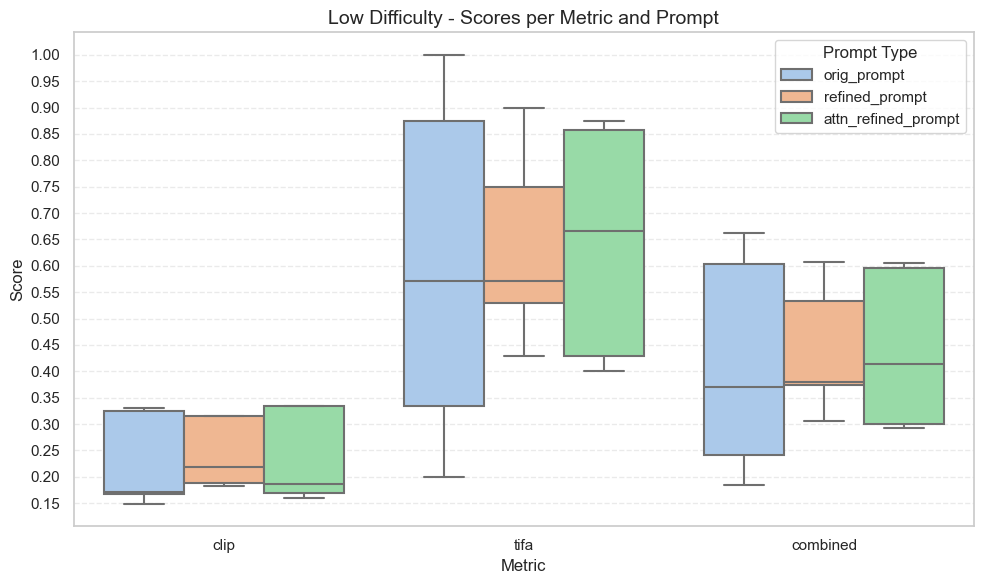

In [41]:
low_df = scores_to_dataframe(low_scores, evaluator.weights)
plot_scores(low_df, title="Low Difficulty - Scores per Metric and Prompt")

## Medium difficulty

In [ ]:
medium_scores = collect_scores(paths['medium'], evaluator, prompt_names)

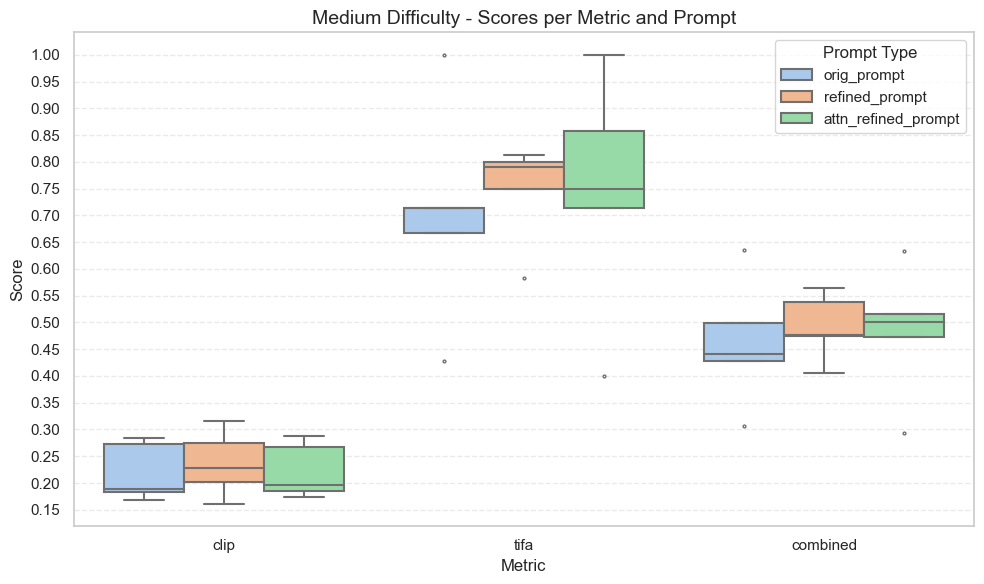

In [44]:
medium_df = scores_to_dataframe(medium_scores, evaluator.weights)
plot_scores(medium_df, title="Medium Difficulty - Scores per Metric and Prompt")

## High difficulty

In [ ]:
high_scores = collect_scores(paths['high'], evaluator, prompt_names)

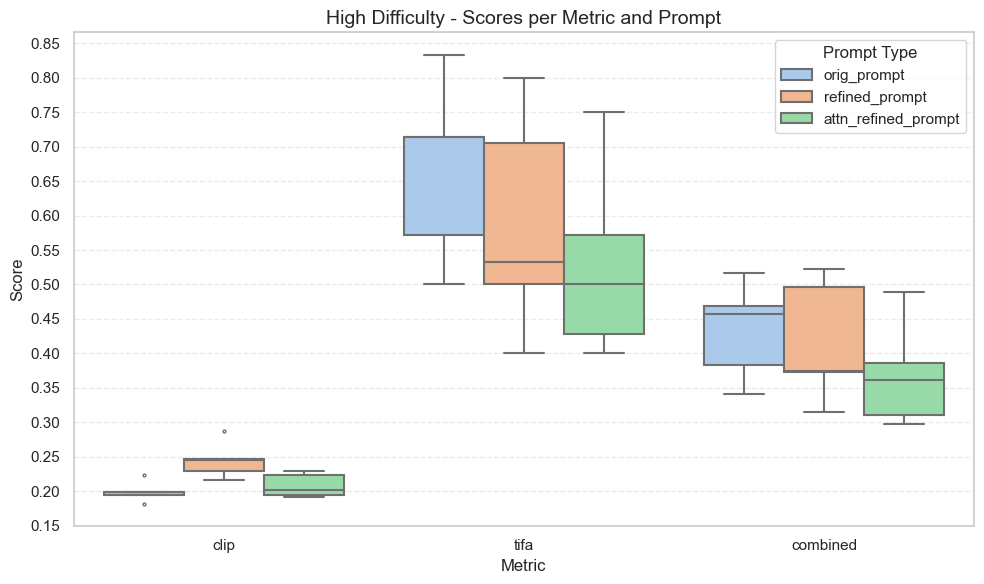

In [46]:
high_df = scores_to_dataframe(high_scores, evaluator.weights)
plot_scores(high_df, title="High Difficulty - Scores per Metric and Prompt")